In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [11]:
df = pd.read_excel("~/git_workspace/Linear_regression/Folds5x2_pp.xlsx",sheet_name=None)
df = pd.concat(df,ignore_index=True)
    
X = df[['AT','V','AP','RH']].to_numpy() #We define our inputs as a matrix selecting the features
y = df['PE'].to_numpy()  #We define the answers as a matrix, here it is a vector

In [12]:
w = np.random.randint(-10, 10, 5) #We now define a vector of our parameters for w0 till w5 regarding our features and define randomly

X_scaled_zero = (X-X.mean(axis = 0))/X.std(axis = 0) #Scaling using z_scores (as the teacher told us to use instead of max/min)
X_scaled_zero = np.c_[np.ones((X_scaled_zero.shape[0], 1)), X_scaled_zero] #Add 1 columns representing x0 = 1 

In [13]:
alpha = 0.05  
delta = 0.000001
max_iter = 100000

input() #Debug

def cost_function(w, X, y):
    error = np.dot(X, w) - y #We first do the operation between our features times our parameters (w0x0, w1x1..., wnxn) 
    #for each obesrvation minus the answer.
    return (np.dot(error.transpose(),error))/(2*len(X_scaled_zero)) #Then we return as the formula but squared it, divided by 
    #number of observations

cost_curr = 10**100
cost_prev = 0
i = 0

while(i < max_iter and (cost_prev-cost_curr > delta or cost_prev-cost_curr < 0)): # do it while the last cost cost > previous cost
    gradient = (np.dot(X_scaled_zero.transpose(), np.dot(X_scaled_zero, w) -y))/len(X_scaled_zero) # derivative part
    w = w - alpha*gradient #We update our gradient
    cost_prev = cost_curr
    cost_curr = cost_function(w, X_scaled_zero, y) #Computes the cost
    if i%50 == 0:
        print(i, 'alpha = ', alpha, 'cost =', cost_curr)
    if(cost_curr > cost_prev): #Decreasing alpha if the cost function augment
        alpha = alpha/1.4 
    i += 1
print('weights w = ', w)

ok
0 alpha =  0.05 cost = 95927.4094284139
50 alpha =  0.05 cost = 577.380426652201
100 alpha =  0.05 cost = 13.956263853230894
150 alpha =  0.05 cost = 10.520598907860853
200 alpha =  0.05 cost = 10.452917774061824
250 alpha =  0.05 cost = 10.42496803591006
300 alpha =  0.05 cost = 10.408374617122734
350 alpha =  0.05 cost = 10.398455092695974
400 alpha =  0.05 cost = 10.392523263153993
450 alpha =  0.05 cost = 10.38897595008869
500 alpha =  0.05 cost = 10.386854603158929
550 alpha =  0.05 cost = 10.385586005173769
600 alpha =  0.05 cost = 10.38482736410602
650 alpha =  0.05 cost = 10.38437368510108
700 alpha =  0.05 cost = 10.38410237809129
750 alpha =  0.05 cost = 10.383940132334349
800 alpha =  0.05 cost = 10.383843106880915
weights w =  [ 4.54365009e+02 -1.47031977e+01 -2.99715618e+00  3.74963630e-01
 -2.29662184e+00]


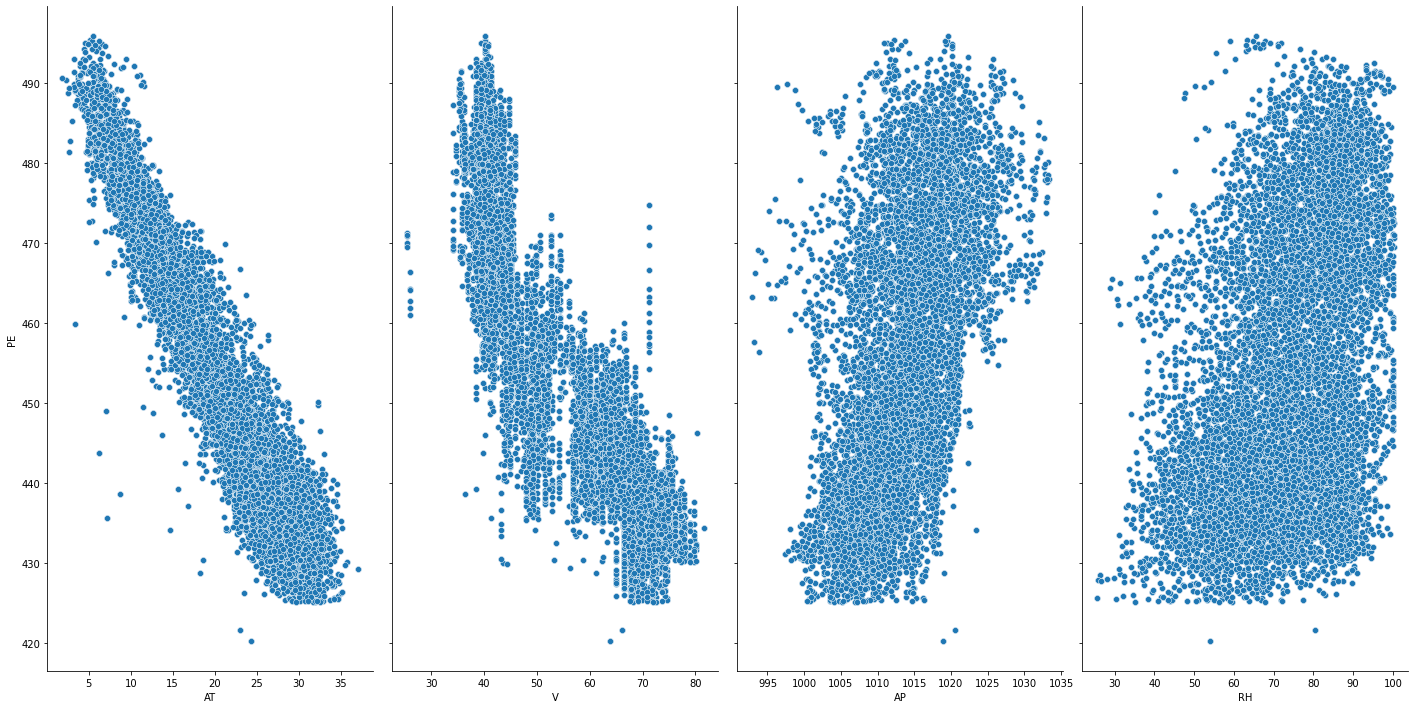

In [14]:
import seaborn as sns

sns.pairplot(df, x_vars = ['AT','V','AP','RH'], y_vars = ['PE'], height = 10, aspect = 0.5) #Plotting or wave of data by features

In [15]:
def R_squared_score(predict, answers): #To caclculate the accuracy of the model but we have to be aware also of others parameters
    error = predict-answers
    squared_err = np.dot(error.transpose(), error)
    answers_mean = answers.mean()
    variance = answers - answers_mean
    var_squared = np.dot(variance.transpose(), variance)
    return (1 - squared_err/ var_squared)

def normal_Equation(X, y):
    return np.dot(np.linalg.inv(np.dot(X.transpose(), X)), np.dot(X.transpose(), y))

def meanAbsoluteError(actual, predicted): #Thus the R² score, if our mean error are too high, it can
    return (1/len(y))*(np.sum(np.abs(predicted - actual)))

def rootMeanSquaredError(actual, predicted):
    error = predicted - actual
    return np.sqrt(np.dot(error.transpose(), error)*(1/len(y)))

In [16]:
predicted = np.dot(w, X_scaled_zero.transpose()) #Computes the predicting value after have founded the parameters
#which minimize the most our cost. W*(X.t)

In [20]:
print("R2 : ", R_squared_score(predicted, y))
print("coeff : ", normal_Equation(X_scaled_zero, y)) #We have the same result as the gradient descent for our w.
print("MAE : ", meanAbsoluteError(y, predicted))
print("RMSE : ", rootMeanSquaredError(y, predicted))#RMSE is very high, meaning the dispersion of standard deviation of the unexplained variance
# is high. 

R2 :  0.9286954260914472
coeff :  [ 4.54365009e+02 -1.47365933e+01 -2.97242952e+00  3.68677907e-01
 -2.30751179e+00]
MAE :  3.6255353390189735
RMSE :  4.55714722633188
